In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from keras.optimizers import *
from keras.callbacks import *
import cv2

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
training_path = r"/content/drive/MyDrive/Explo2/better_training_data"
testing_path = r"/content/drive/MyDrive/Explo2/better_testing_data"
training_datas = tf.keras.utils.image_dataset_from_directory(training_path,
                                                            validation_split=0.2,
                                                            subset="training",
                                                            shuffle= True,
                                                            label_mode='categorical',
                                                            color_mode='grayscale',
                                                            image_size=(28, 28),
                                                            seed=42,
                                                            batch_size=16)
validation_datas = tf.keras.utils.image_dataset_from_directory(training_path,
                                                            validation_split=0.2,
                                                            subset="validation",
                                                            shuffle= True,
                                                            label_mode='categorical',
                                                            color_mode='grayscale',
                                                            image_size=(28, 28),
                                                            seed=42,
                                                            batch_size=16)
testing_datas = tf.keras.utils.image_dataset_from_directory(testing_path,
                                                            shuffle= True,
                                                            label_mode='categorical',
                                                            color_mode='grayscale',
                                                            image_size=(28, 28),
                                                            batch_size=16)
STEP_SIZE_TRAIN=tf.data.experimental.cardinality(training_datas).numpy()
STEP_SIZE_VALID=tf.data.experimental.cardinality(validation_datas).numpy()

Found 17889 files belonging to 45 classes.
Using 14312 files for training.
Found 17889 files belonging to 45 classes.
Using 3577 files for validation.
Found 12057 files belonging to 45 classes.


In [4]:
!pip install tensorflow

In [5]:
better_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same'),
    tf.keras.layers.BatchNormalization(axis = 3),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2),padding='same'),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='same'),
    tf.keras.layers.BatchNormalization(axis = 3),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2),padding='same'),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(128,(3,3),activation='relu',padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu',padding='same'),
    tf.keras.layers.BatchNormalization(axis = 3),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2),padding='same'),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(45, activation='softmax')
])

better_model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = better_model.fit(training_datas,
        steps_per_epoch=STEP_SIZE_TRAIN,
        epochs=40,
        validation_data=validation_datas,
        validation_steps=STEP_SIZE_VALID)

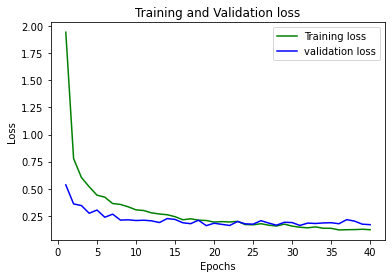

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,41)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

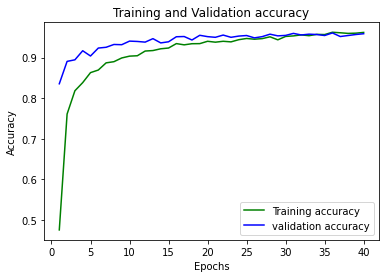

In [ ]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(1,41)
plt.plot(epochs, acc_train, 'g', label='Training accuracy')
plt.plot(epochs, acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
better_model.save('better_cnn')

INFO:tensorflow:Assets written to: better_cnn\assets


INFO:tensorflow:Assets written to: better_cnn\assets


In [ ]:
import keras
eval_model = keras.models.load_model('better_cnn')
loss, acc = eval_model.evaluate(testing_datas)

753/753 [==============================] - 18s 23ms/step - loss: 0.1625 - accuracy: 0.9622
